# Logistics Regression

## Basic Info 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

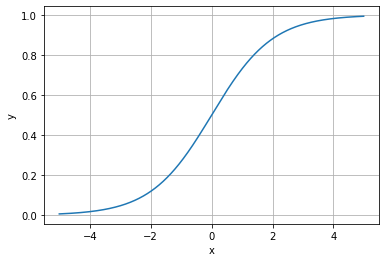

In [2]:
x = np.arange(-5,5,0.01)
y = 1 / (1+np.exp(-x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

---
Iris dataset: including 4 feaures (sepal length, sepal width, petal length, petal width), 1 labels (setosa(0), versicolor(1), virginica(2))

## Load data 

In [3]:
from sklearn.datasets import load_iris

data = load_iris() 
iris_target = data.target
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names)

In [4]:
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
pd.Series(iris_target).value_counts()

2    50
1    50
0    50
dtype: int64

In [6]:
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_all = iris_features.copy()
iris_all['target'] = iris_target
iris_all.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 不同的特征组合对于不同类别的花的散点分布

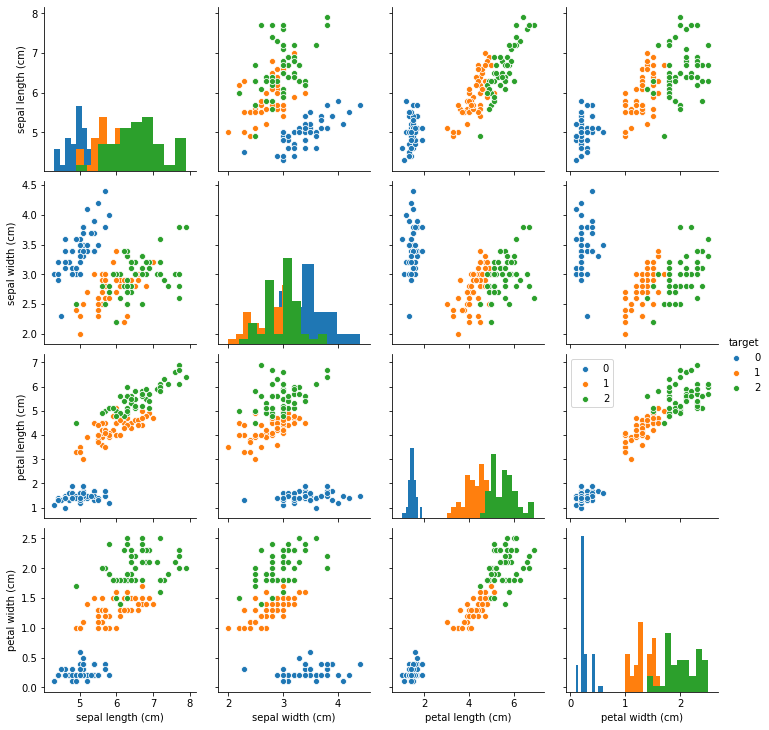

In [9]:
sns.pairplot(data=iris_all, diag_kind='hist', hue='target')
plt.legend()
plt.show()

### 不同类别在不同特征上的分布差异

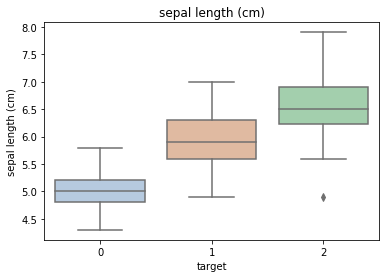

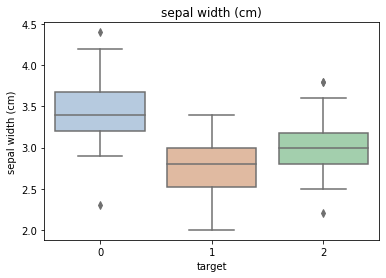

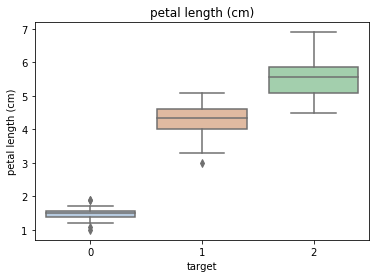

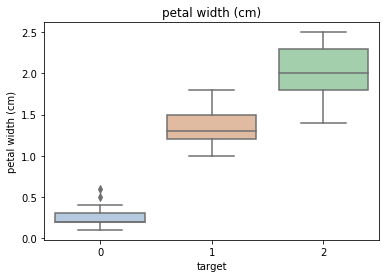

In [10]:
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

### 取前三个特征绘制三维散点图

In [11]:
from mpl_toolkits.mplot3d import Axes3D

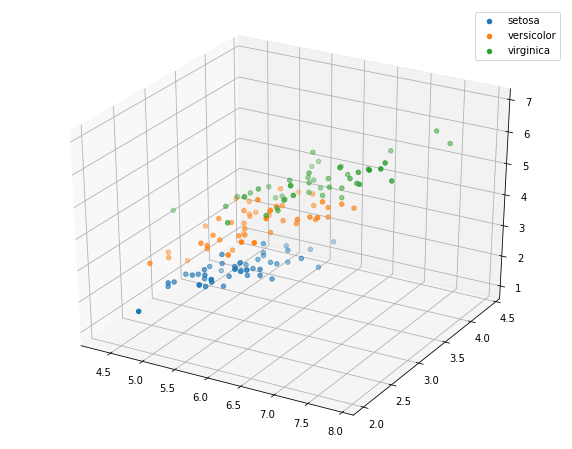

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values

ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2], label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2], label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2], label='virginica')

plt.legend(loc='best')
plt.show()

## Logistic Regression Modeling

In [13]:
from sklearn.model_selection import train_test_split

### Binary-Classes

In [14]:
# 选择类别为0和1的样本
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size=0.2, random_state=2020)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [18]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
print('the weight of Logistic Regression:', clf.coef_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]


In [20]:
print('the intercept(w0) of Logistic Regression:', clf.intercept_)

the intercept(w0) of Logistic Regression: [-6.53367714]


In [21]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

#### Accuracy_score

In [22]:
from sklearn import metrics 
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(y_test, test_predict))

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0


#### confusion matrix

In [23]:
confusion_matrix_result = metrics.confusion_matrix(y_test, test_predict)
print('The confusion matrix result:\n', confusion_matrix_result)

The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


#### Heat Map 

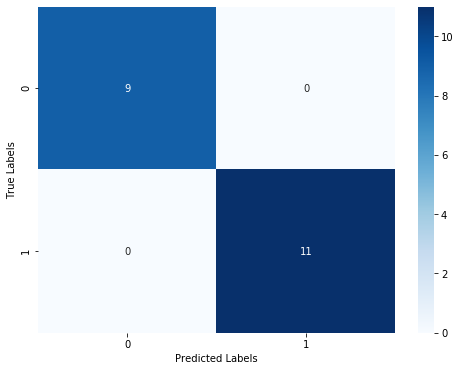

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Multi-Classes

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_target, random_state=2020, test_size=0.2)

In [26]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [27]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
print('the weight of Logistic Regression:\n', clf.coef_)

the weight of Logistic Regression:
 [[-0.45928925  0.83069891 -2.26606529 -0.99743982]
 [ 0.33117319 -0.72863425 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206465  2.33447676  1.98455011]]


In [29]:
print('the intercept of Logistic Regression:\n', clf.intercept_)

the intercept of Logistic Regression:
 [  9.43880657   3.93047365 -13.36928022]


#### predict_proba预测概率

In [30]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

In [31]:
train_predict_proba = clf.predict_proba(X_train)
test_predict_proba = clf.predict_proba(X_test)

In [32]:
print('The test predict Probability of each class:\n', test_predict_proba)

# 1st column: predict class0
# 2nd column: predict class1
# 3rd column: predict class2

The test predict Probability of each class:
 [[1.03461741e-05 2.33279480e-02 9.76661706e-01]
 [9.69926591e-01 3.00732872e-02 1.21677008e-07]
 [2.09992553e-02 8.69156614e-01 1.09844130e-01]
 [3.61934877e-03 7.91979965e-01 2.04400686e-01]
 [7.90943222e-03 8.00605297e-01 1.91485271e-01]
 [7.30034948e-04 6.60508053e-01 3.38761912e-01]
 [1.68614213e-04 1.86322046e-01 8.13509340e-01]
 [1.06915329e-01 8.90815534e-01 2.26913679e-03]
 [9.46928072e-01 5.30707277e-02 1.20016064e-06]
 [9.62346386e-01 3.76532219e-02 3.91897312e-07]
 [1.19533391e-04 1.38823470e-01 8.61056997e-01]
 [8.78881875e-03 6.97207356e-01 2.94003826e-01]
 [9.73938144e-01 2.60617335e-02 1.22613844e-07]
 [1.78434058e-03 4.79518176e-01 5.18697484e-01]
 [5.56924351e-04 2.46776840e-01 7.52666235e-01]
 [9.83549843e-01 1.64500660e-02 9.13617300e-08]
 [1.65201473e-02 9.54672748e-01 2.88071046e-02]
 [8.99853750e-03 7.82707574e-01 2.08293889e-01]
 [2.98015038e-05 5.45900075e-02 9.45380191e-01]
 [9.35695861e-01 6.43039539e-02 1.85301386e

#### Accuracy_score

In [33]:
print('The accuracy of the Logistic Regression for training set is:', metrics.accuracy_score(y_train, train_predict))
print('The accuracy of the Logistic Regression for testing set is:', metrics.accuracy_score(y_test, test_predict))

The accuracy of the Logistic Regression for training set is: 0.9833333333333333
The accuracy of the Logistic Regression for testing set is: 0.8666666666666667


#### confusion matrix 

In [34]:
confusion_matrix_result = metrics.confusion_matrix(y_test, test_predict)
print('The confusion matrix result:\n', confusion_matrix_result)

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


#### Heat Map

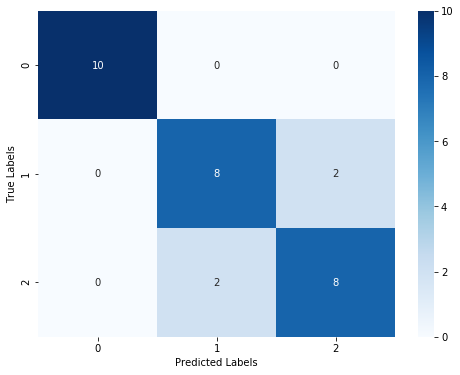

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

---
# Naive Bayes

Naive Bayes一般应用在文本分类，垃圾邮件的分类，信用评估，钓鱼网站监测等。

## Iris Dataset

!pip install --upgrade scikit-learn

import warnings 
warnings.filterwarnings('ignore')

- 高斯朴素贝叶斯假设每个特征都服从高斯分布
- $X \~ N(\mu, \sigma^2)$
---

In [59]:
import numpy as np

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [60]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [61]:
clf = GaussianNB(var_smoothing=1e-08)
clf.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)

In [62]:
y_pred = clf.predict(X_test)
acc = np.sum(y_test == y_pred) / X_test.shape[0]
print('Test Acc: %.3f' % acc)

Test Acc: 0.967


In [63]:
y_proba = clf.predict_proba(X_test[:1])
y_pred = clf.predict(X_test[:1])
print('预计的概率值：', y_proba)
print('预计的值：', y_pred)

预计的概率值： [[1.63542393e-232 2.18880483e-006 9.99997811e-001]]
预计的值： [2]


## Discrete Dataset

In [64]:
import random
from sklearn.naive_bayes import CategoricalNB

In [65]:
rng = np.random.RandomState(1)

# 随机生成600个100维的数据，每一维的特征都是[0,4]之前的整数
X = rng.randint(5, size=(600,100))
y = np.array([1,2,3,4,5,6] * 100)
data = np.c_[X, y]

In [66]:
# X和y进行整体打散
random.shuffle(data)
X = data[:, :-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
clf = CategoricalNB(alpha=1)   # Laplace smoothing parameter: alpha 
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print('Test Acc: %.3f'%acc)

Test Acc: 0.575


In [68]:
x = rng.randint(5, size=(1,100))
print(clf.predict_proba(x))
print(clf.predict(x))

[[3.66508928e-05 8.21629801e-06 1.42749217e-05 9.92683701e-01
  6.70479571e-03 5.52361489e-04]]
[4]


# K-Nearest Neighbors
## Binary Class

In [69]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [70]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [71]:
k_list = [1,3,5,8,10,15]
h = 0.02 

# 创建不同颜色的画布
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

<function matplotlib.pyplot.show(*args, **kw)>

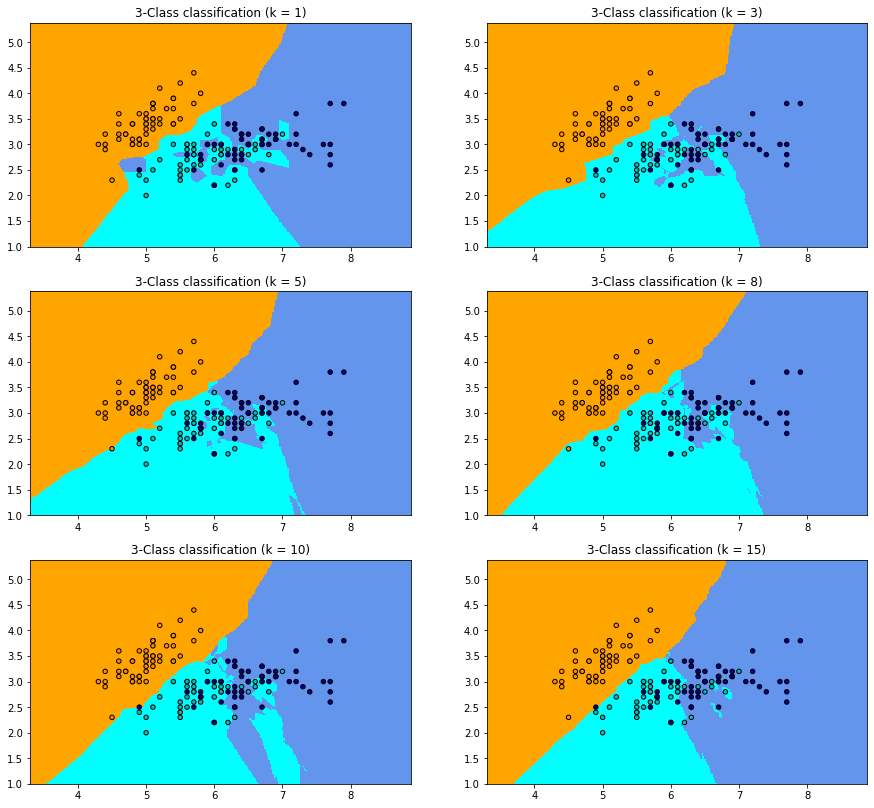

In [76]:
plt.figure(figsize=(15,14))
for ind, k in enumerate(k_list):
    clf = KNeighborsClassifier(k)   # n_neighbors
    clf.fit(X, y)
    
    # decision boundary
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(321+ind)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title('3-Class classification (k = %i)' %k)
plt.show

## Iris Dataset

In [77]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')  # p=2, metric='minkowski' stand for Euclidean metric
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
X_pred= clf.predict(X_test)
acc = sum(X_pred == y_test)/X_pred.shape[0]
print('Test Acc: %.3f' % acc)

Test Acc: 0.967


## 模拟数据集

In [84]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

In [85]:
np.random.seed(0)

# 随机生成40个（0，1）之间的数，乘以5，在进行升序
X = np.sort(5*np.random.rand(40,1),axis=0)
# 创建[0,5]之间的500个数的等差数列，作为测试数据
T = np.linspace(0,5,500)[:,np.newaxis]
# 使用sin函数得到y值，并拉伸的一维
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

y_encoded = lab_enc.fit_transform(y)

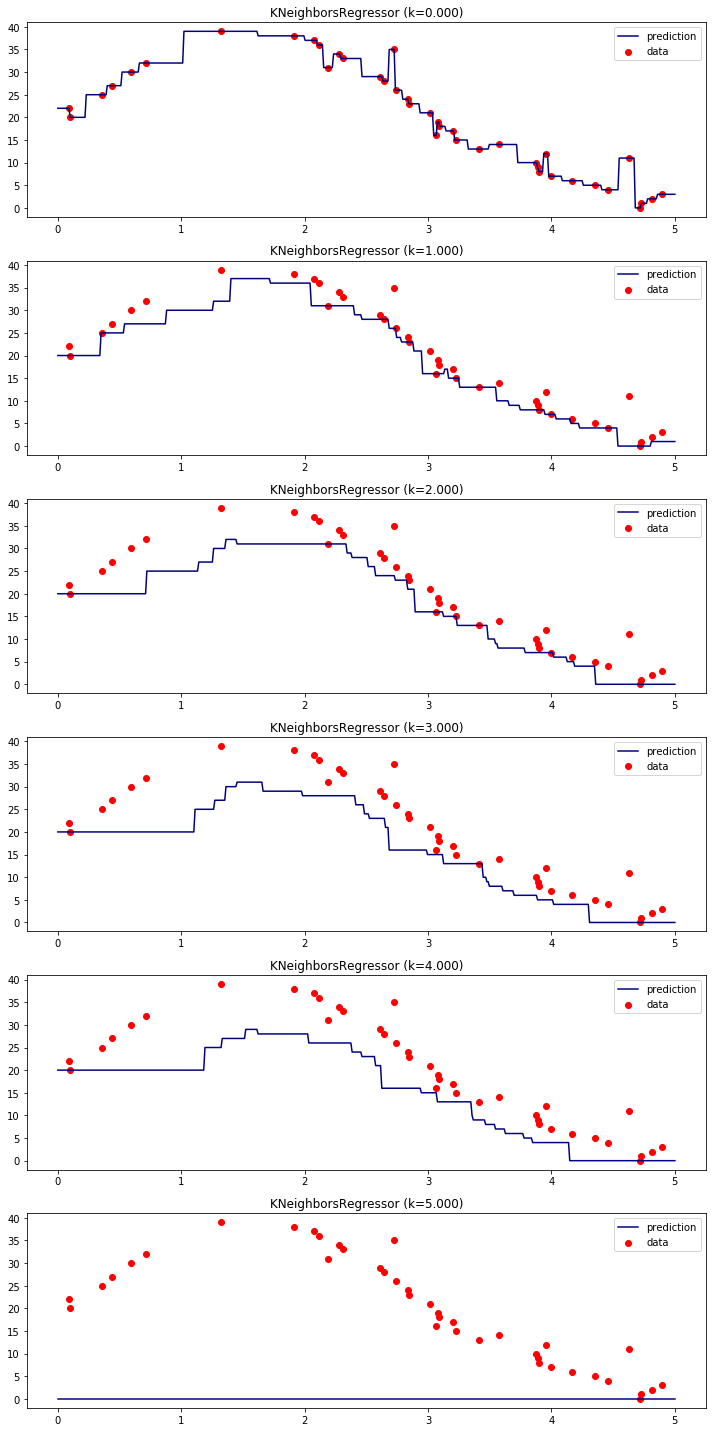

In [101]:
n_neighbors=[1,3,5,8,10,40]

plt.figure(figsize=(10,20))
for i, k in enumerate(n_neighbors):
    clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    clf.fit(X, y_encoded)
    y_ = clf.predict(T)
    plt.subplot(6,1,i+1)
    plt.scatter(X, y_encoded, c='red', label='data')
    plt.plot(T, y_, c='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('KNeighborsRegressor (k=%.3f)'%i)
    
plt.tight_layout()
plt.show()

## Horse-colic Dataset

In [103]:
from sklearn.impute import KNNImputer   # 对null进行填充
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline